<a href="https://colab.research.google.com/github/younghun-cha/-/blob/main/Thyroid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "/content/drive/MyDrive/Colab Notebooks/Big Data Engineering/thyroidDF.csv"

data = pd.read_csv(f'{file}')
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## Exploratory Data Analysis (EDA)

In [4]:
data.shape

(9172, 31)

In [5]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

### 결측치 확인

In [7]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [8]:
nulldf = data.isnull().sum().to_frame()
nulldf.columns = ['null count']
nulldf = nulldf.sort_values('null count', ascending=True)
nulldf

,null count
age,0
referral_source,0
TBG_measured,0
FTI_measured,0
T4U_measured,0
TT4_measured,0
T3_measured,0
TSH_measured,0
target,0
hypopituitary,0


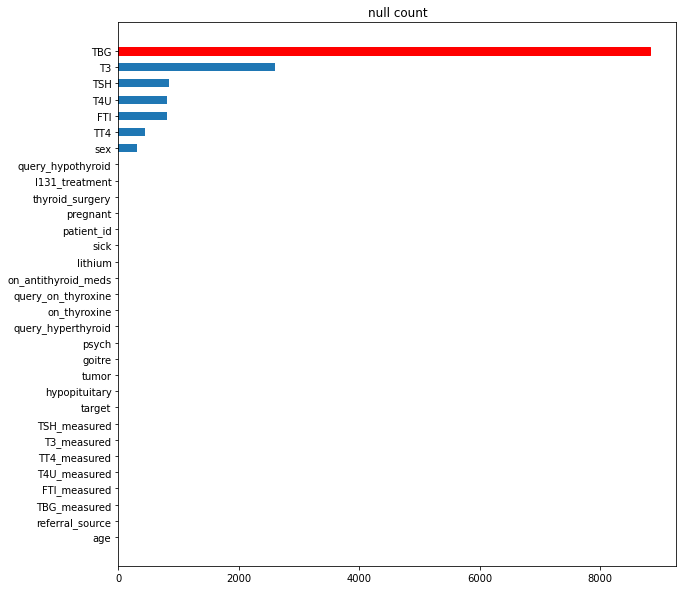

In [9]:
plt.figure(figsize=(10, 10))
plt.barh(nulldf.index, nulldf['null count'], height=0.5)[-1].set_color('red')
plt.title('null count')
plt.show()

### 수치형 데이터 확인
- 요약 통계값

In [10]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


- 이상치

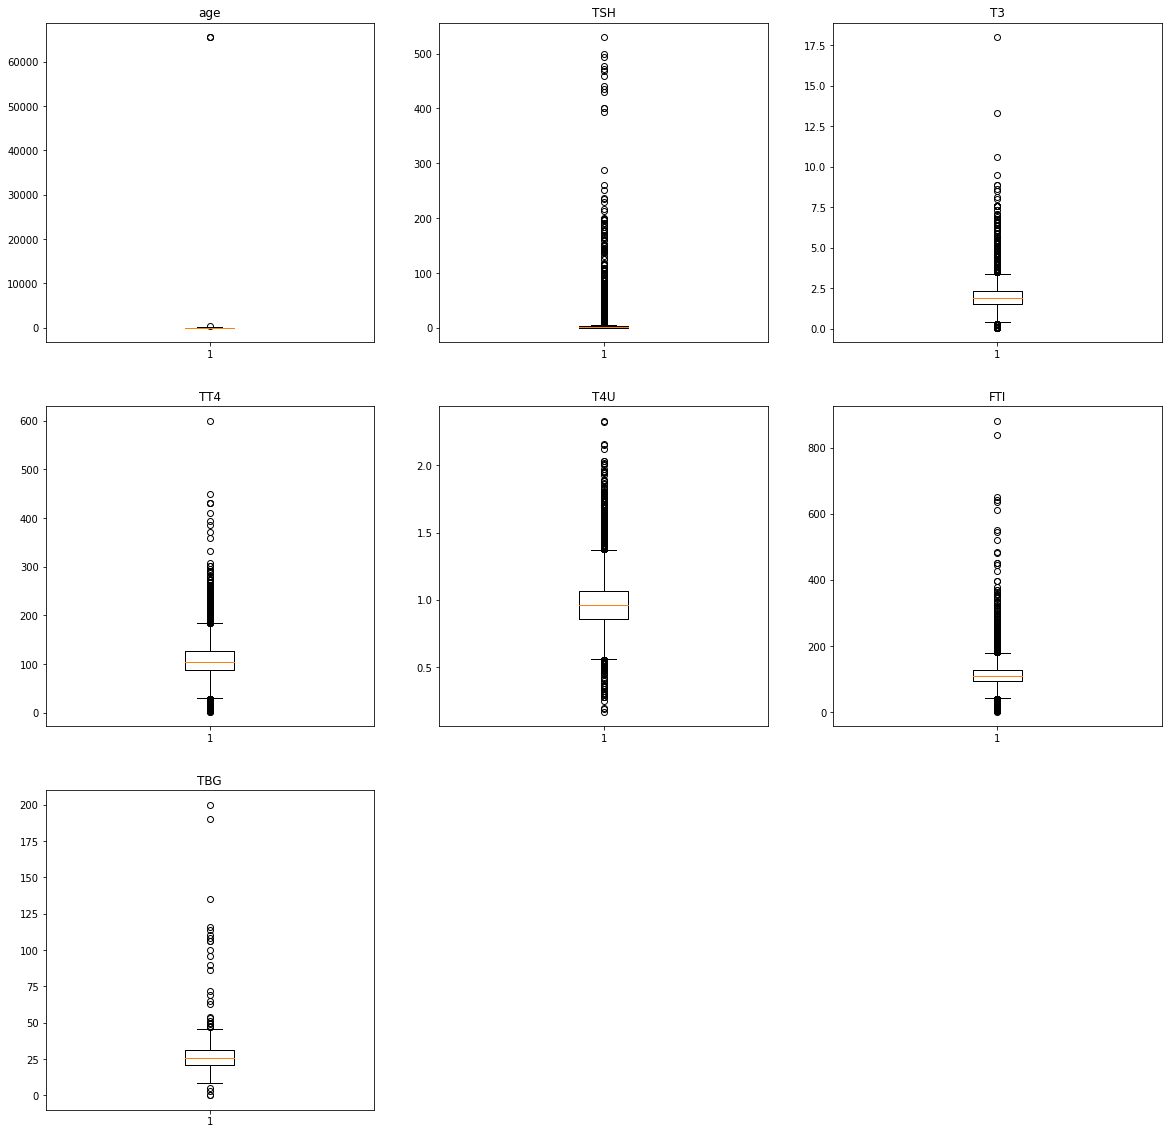

In [11]:
stat_col = list(data.describe().columns)
stat_col.remove('patient_id')

plt.figure(figsize=(20, 20))

for col in range(len(stat_col)):
  plt.subplot(3, 3, col+1)
  temp = data[stat_col[col]].dropna(how='any')
  plt.boxplot(temp)
  plt.title(stat_col[col])

plt.show()

In [12]:
data[data['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
2976,455,F,f,f,f,f,f,f,f,f,...,118.0,t,1.13,t,104.0,f,NaN,SVI,-,850530001
5710,65511,M,f,f,f,f,f,f,f,f,...,113.0,t,1.08,t,104.0,f,NaN,other,-,860210008
6392,65512,M,f,f,f,f,f,f,f,f,...,112.0,t,0.84,t,133.0,f,NaN,other,-,860403050
8105,65526,F,f,f,f,f,f,f,f,f,...,132.0,t,1.02,t,129.0,f,NaN,other,-,861014041


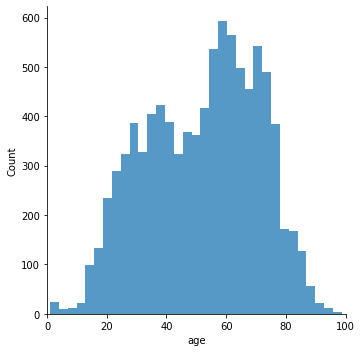

In [13]:
sns.displot(data['age'])
plt.xlim(0, 100)
plt.show()

<Axes: >

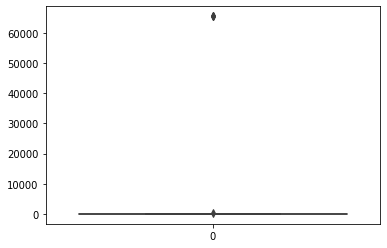

In [14]:
sns.boxplot(data['age'])

<Axes: >

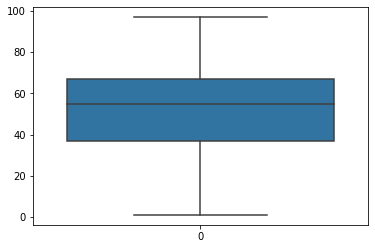

In [15]:
temp = data[data['age'] < 100]
sns.boxplot(temp['age'])

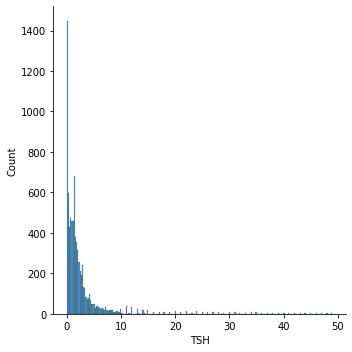

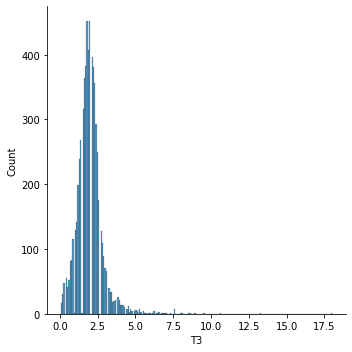

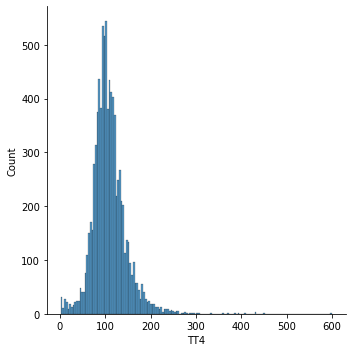

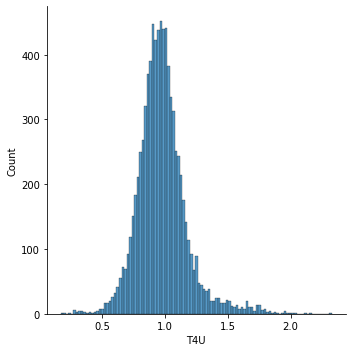

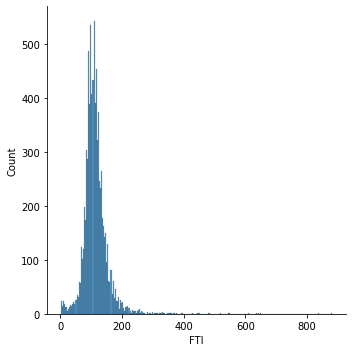

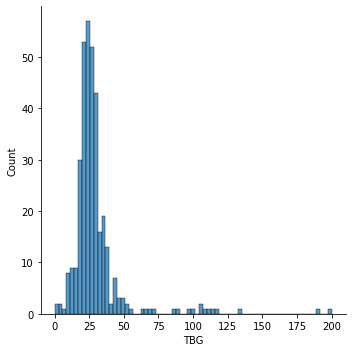

In [16]:
stat_col.remove('age')
for col in stat_col:
  temp = data[col].dropna(how='any')
  if col == 'TSH':
    temp = temp[temp < 50]
  sns.displot(temp)

### 범주형 데이터 확인

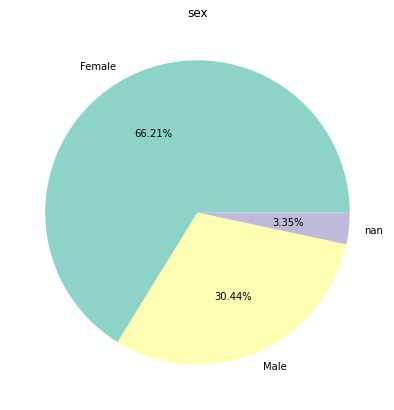

In [17]:
sex_count = data['sex'].value_counts()
sex_count.loc['nan'] = data['sex'].isnull().sum()
label = list(sex_count.index)
label[label.index('F')] = 'Female'
label[label.index('M')] = 'Male'
color = sns.color_palette('Set3')

plt.figure(figsize=(7, 7))
plt.pie(sex_count, labels=label, colors=color, autopct='%.2f%%')
plt.title('sex')
plt.show()

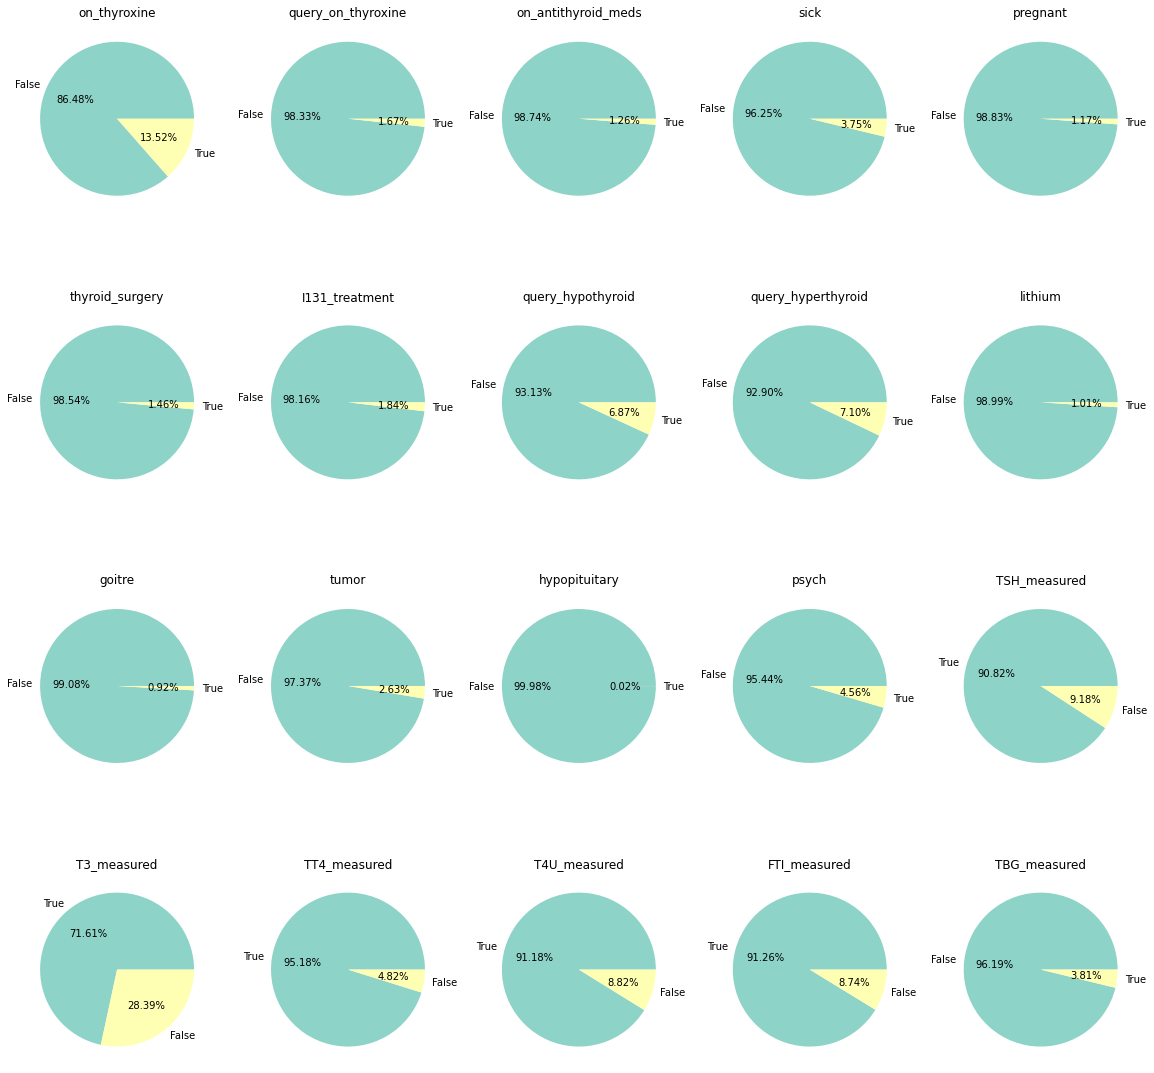

In [18]:
bool_col = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
            'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 
            'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

plt.figure(figsize=(20, 20))
for idx, col in enumerate(bool_col):
  plt.subplot(4, 5, idx+1)
  count = data[col].value_counts()
  label = list(count.index)
  label[label.index('f')] = 'False'
  label[label.index('t')] = 'True'

  color = sns.color_palette('Set3')
  plt.pie(count, labels=label, colors=color, autopct='%.2f%%')
  plt.title(col)

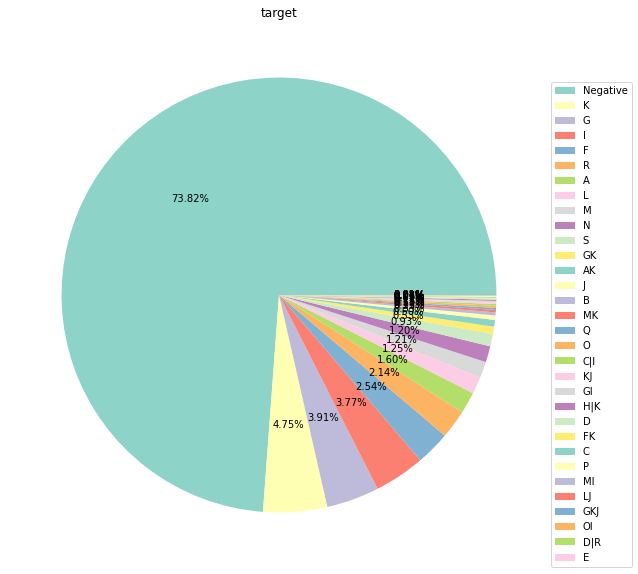

In [19]:
target_count = data['target'].value_counts()
label = list(target_count.index)
label[label.index('-')] = 'Negative'

color = sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
plt.pie(target_count, colors=color, autopct='%.2f%%')
plt.title('target')
plt.legend(label, loc=(1, 0))
plt.show()

Text(0.5, 1.0, 'spearman')

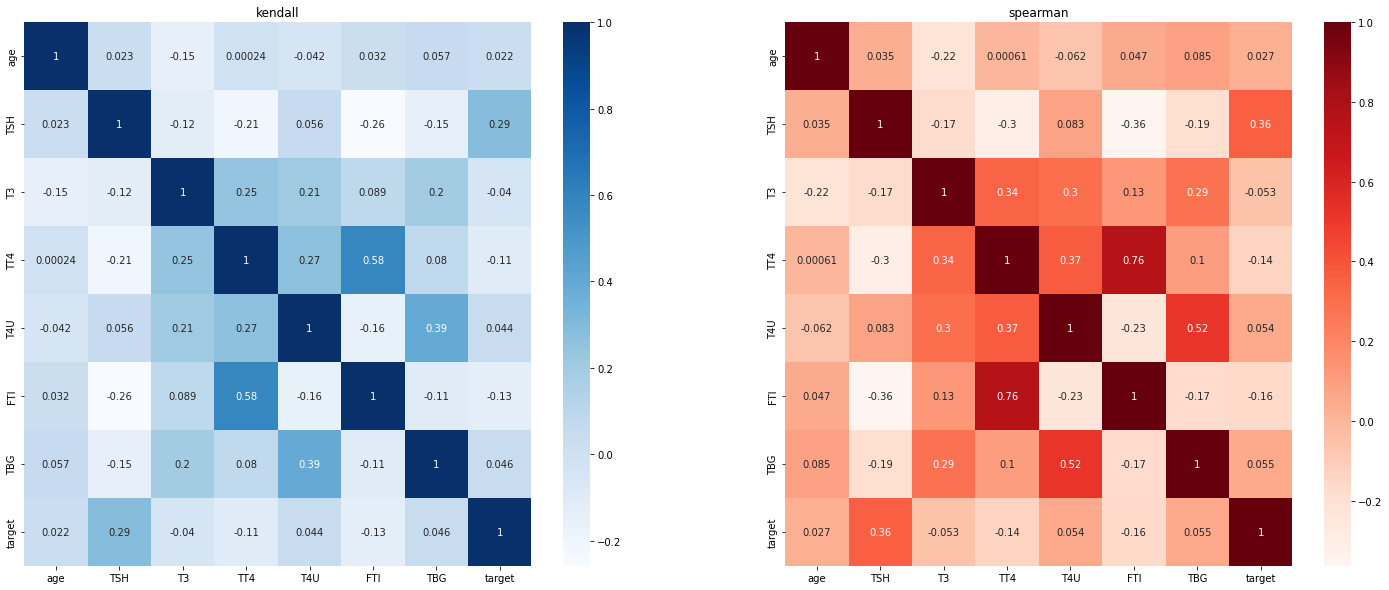

In [20]:
tempTarget_transform = {'-': 0, 'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2, 'G': 2, 'H': 2}

corrdata = data.copy()
corrdata['target'] = data['target'].map(tempTarget_transform)
corrdata.dropna(subset=['target'], inplace=True)
corrdata.drop('patient_id', axis=1, inplace=True)

corr1 = corrdata.corr(method='kendall')
corr2 = corrdata.corr(method='spearman')

plt.figure(figsize=(25, 10))

plt.subplot(121)
sns.heatmap(corr1, cmap='Blues', annot=True)
plt.title('kendall')

plt.subplot(122)
sns.heatmap(corr2, cmap='Reds', annot=True)
plt.title('spearman')

# Data Preprocessing

### Data Cleaning -> Data Transformation -> Data Imputation -> Data Scaling

- Data Cleaning

In [21]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [22]:
drop_col = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG', 'referral_source', 'patient_id']
data.drop(labels=drop_col, axis=1, inplace=True)
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

In [23]:
outlier_ages = data.loc[data['age'] > 100, 'age']
outlier_ages.index

data.drop(outlier_ages.index, axis=0, inplace=True)
data.shape

(9168, 22)

In [24]:
impsex = data[(data['sex'].isnull()) & (data['pregnant'] == 't')].index
data.loc[impsex, 'sex'] = 'F'

In [25]:
dropsex_idx = data[data['sex'].isnull()==True].index
dropsex_idx
data.drop(dropsex_idx, axis=0, inplace=True)
data.shape

(8865, 22)

- Target Transformation & Separation

In [26]:
target_transform = {'-': 'negative', 'A': 'hyperthyroid', 'B': 'hyperthyroid', 'C': 'hyperthyroid', 'D': 'hyperthyroid', 
                    'E': 'hypothyroid', 'F': 'hypothyroid', 'G': 'hypothyroid', 'H': 'hypothyroid'}

data['target'] = data['target'].map(target_transform)
data.dropna(subset=['target'], inplace=True)
data['target'].unique()

array(['negative', 'hypothyroid', 'hyperthyroid'], dtype=object)

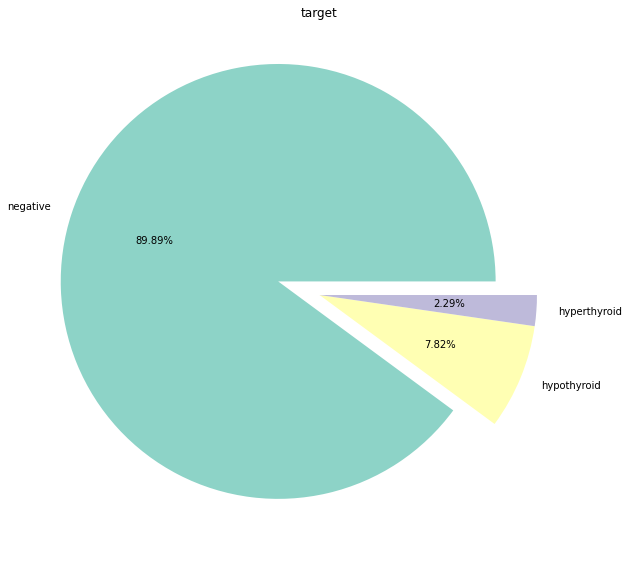

In [27]:
target = data['target'].copy()

target_count = target.value_counts()
label = target_count.index
color = sns.color_palette('Set3')
explode_ = [0.2, 0, 0]

plt.figure(figsize=(10, 10))
plt.pie(target_count, labels=label, colors=color, autopct='%.2f%%', explode=explode_)
plt.title('target')
plt.show()

In [28]:
target = data['target'].copy()
data.drop('target', axis=1, inplace=True)
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.6,1.9,128.0,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN
5,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN


- Categorical Variables Transformation (one-hot encoding)

In [29]:
data.replace('f', 'F', inplace=True)
data.replace('t', 'T', inplace=True)

data = pd.get_dummies(data)
data

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
0,29,0.3,NaN,NaN,NaN,NaN,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
1,29,1.6,1.9,128.0,NaN,NaN,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,41,NaN,NaN,NaN,NaN,NaN,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
3,36,NaN,NaN,NaN,NaN,NaN,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5,60,NaN,NaN,NaN,NaN,NaN,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,NaN,NaN,88.0,0.74,119.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
9167,56,NaN,NaN,64.0,0.83,77.0,0,1,1,0,...,1,1,0,1,0,1,0,1,1,0
9168,22,NaN,NaN,91.0,0.92,99.0,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
9170,47,NaN,NaN,75.0,0.85,88.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


- Data Imputation (Median Imputation)

In [30]:
ex_null_col = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in ex_null_col:
  data[col].fillna(0, inplace=True)

data.isnull().sum()

age                      0
TSH                      0
T3                       0
TT4                      0
T4U                      0
FTI                      0
sex_F                    0
sex_M                    0
on_thyroxine_F           0
on_thyroxine_T           0
query_on_thyroxine_F     0
query_on_thyroxine_T     0
on_antithyroid_meds_F    0
on_antithyroid_meds_T    0
sick_F                   0
sick_T                   0
pregnant_F               0
pregnant_T               0
thyroid_surgery_F        0
thyroid_surgery_T        0
I131_treatment_F         0
I131_treatment_T         0
query_hypothyroid_F      0
query_hypothyroid_T      0
query_hyperthyroid_F     0
query_hyperthyroid_T     0
lithium_F                0
lithium_T                0
goitre_F                 0
goitre_T                 0
tumor_F                  0
tumor_T                  0
hypopituitary_F          0
psych_F                  0
psych_T                  0
dtype: int64

In [31]:
data

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
0,29,0.3,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
1,29,1.6,1.9,128.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,41,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
3,36,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5,60,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,0.0,0.0,88.0,0.74,119.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
9167,56,0.0,0.0,64.0,0.83,77.0,0,1,1,0,...,1,1,0,1,0,1,0,1,1,0
9168,22,0.0,0.0,91.0,0.92,99.0,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
9170,47,0.0,0.0,75.0,0.85,88.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


## Train & Test Data Set Split (Holdout Method -> train:test=8:2)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
target

0       negative
1       negative
2       negative
3       negative
5       negative
          ...   
9166    negative
9167    negative
9168    negative
9170    negative
9171    negative
Name: target, Length: 7293, dtype: object

In [34]:
mapping_dict = {'negative': 0, 'hypothyroid': 1, 'hyperthyroid': 2}

target = target.map(mapping_dict)
target

0       0
1       0
2       0
3       0
5       0
       ..
9166    0
9167    0
9168    0
9170    0
9171    0
Name: target, Length: 7293, dtype: int64

In [35]:
data

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
0,29,0.3,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
1,29,1.6,1.9,128.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,41,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
3,36,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5,60,0.0,0.0,0.0,0.00,0.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,0.0,0.0,88.0,0.74,119.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
9167,56,0.0,0.0,64.0,0.83,77.0,0,1,1,0,...,1,1,0,1,0,1,0,1,1,0
9168,22,0.0,0.0,91.0,0.92,99.0,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
9170,47,0.0,0.0,75.0,0.85,88.0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


In [36]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=1)

In [37]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (5834, 35)
y_train shape : (5834,)
x_test shape : (1459, 35)
y_test shape : (1459,)


## Scaling (RobustScaler)

In [38]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [39]:
numeric_col = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
x_train_numeric = x_train[numeric_col]
x_test_numeric = x_test[numeric_col]

display(x_train_numeric)
display(x_test_numeric)

,age,TSH,T3,TT4,T4U,FTI
2179,57,0.90,1.5,91.0,0.78,116.0
2180,25,4.60,2.4,61.0,0.82,75.0
5603,60,0.06,1.6,123.0,0.81,152.0
256,74,0.10,1.5,73.0,0.95,77.0
8111,87,2.00,1.3,98.0,0.91,108.0
...,...,...,...,...,...,...
1084,32,0.10,0.0,107.0,0.93,115.0
7553,70,2.30,1.6,86.0,0.72,119.0
4050,63,5.60,2.2,99.0,1.02,97.0
5546,58,2.40,0.0,122.0,1.12,108.0


,age,TSH,T3,TT4,T4U,FTI
8131,35,0.00,0.0,0.0,0.00,0.0
8493,50,0.17,0.0,152.0,1.30,117.0
4357,39,0.93,2.6,130.0,1.13,115.0
8480,65,23.00,0.0,78.0,0.92,85.0
8125,69,1.80,1.6,109.0,0.93,117.0
...,...,...,...,...,...,...
2561,54,0.00,0.0,0.0,0.00,0.0
2130,78,10.00,2.0,69.0,0.96,71.0
3505,14,0.00,0.0,100.0,1.09,91.0
7746,80,0.94,1.1,133.0,0.83,160.0


In [40]:
x_train.drop(numeric_col, axis=1, inplace=True)
x_test.drop(numeric_col, axis=1, inplace=True)

x_train.head()
x_test.head()

,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,query_on_thyroxine_F,query_on_thyroxine_T,on_antithyroid_meds_F,on_antithyroid_meds_T,sick_F,sick_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
8131,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
8493,1,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
4357,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
8480,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
8125,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


In [41]:
colname = x_train_numeric.columns
rowname = x_train_numeric.index
rowname2 = x_test_numeric.index

In [42]:
scaler = RobustScaler()
scaler.fit(x_train_numeric)

x_train_scaled = scaler.transform(x_train_numeric)
x_test_scaled = scaler.transform(x_test_numeric)

In [43]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

x_train_scaled.columns = colname
x_test_scaled.columns = colname
x_train_scaled.index = rowname
x_test_scaled.index = rowname2

display(x_train_scaled)
display(x_test_scaled)

,age,TSH,T3,TT4,T4U,FTI
2179,0.066667,-0.135135,-0.090909,-0.285714,-0.772727,0.314286
2180,-1.000000,1.531532,0.318182,-1.142857,-0.590909,-0.857143
5603,0.166667,-0.513514,-0.045455,0.628571,-0.636364,1.342857
256,0.633333,-0.495495,-0.090909,-0.800000,0.000000,-0.800000
8111,1.066667,0.360360,-0.181818,-0.085714,-0.181818,0.085714
...,...,...,...,...,...,...
1084,-0.766667,-0.495495,-0.772727,0.171429,-0.090909,0.285714
7553,0.500000,0.495495,-0.045455,-0.428571,-1.045455,0.400000
4050,0.266667,1.981982,0.227273,-0.057143,0.318182,-0.228571
5546,0.100000,0.540541,-0.772727,0.600000,0.772727,0.085714


,age,TSH,T3,TT4,T4U,FTI
8131,-0.666667,-0.540541,-0.772727,-2.885714,-4.318182,-3.000000
8493,-0.166667,-0.463964,-0.772727,1.457143,1.590909,0.342857
4357,-0.533333,-0.121622,0.409091,0.828571,0.818182,0.285714
8480,0.333333,9.819820,-0.772727,-0.657143,-0.136364,-0.571429
8125,0.466667,0.270270,-0.045455,0.228571,-0.090909,0.342857
...,...,...,...,...,...,...
2561,-0.033333,-0.540541,-0.772727,-2.885714,-4.318182,-3.000000
2130,0.766667,3.963964,0.136364,-0.914286,0.045455,-0.971429
3505,-1.366667,-0.540541,-0.772727,-0.028571,0.636364,-0.400000
7746,0.833333,-0.117117,-0.272727,0.914286,-0.545455,1.571429


In [44]:
x_train_scaled = pd.concat([x_train_scaled, x_train], axis=1)
x_test_scaled = pd.concat([x_test_scaled, x_test], axis=1)

display(x_train_scaled.head())
display(x_test_scaled.head())

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
2179,0.066667,-0.135135,-0.090909,-0.285714,-0.772727,0.314286,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
2180,-1.000000,1.531532,0.318182,-1.142857,-0.590909,-0.857143,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5603,0.166667,-0.513514,-0.045455,0.628571,-0.636364,1.342857,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
256,0.633333,-0.495495,-0.090909,-0.800000,0.000000,-0.800000,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
8111,1.066667,0.360360,-0.181818,-0.085714,-0.181818,0.085714,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
8131,-0.666667,-0.540541,-0.772727,-2.885714,-4.318182,-3.000000,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
8493,-0.166667,-0.463964,-0.772727,1.457143,1.590909,0.342857,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
4357,-0.533333,-0.121622,0.409091,0.828571,0.818182,0.285714,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
8480,0.333333,9.819820,-0.772727,-0.657143,-0.136364,-0.571429,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
8125,0.466667,0.270270,-0.045455,0.228571,-0.090909,0.342857,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


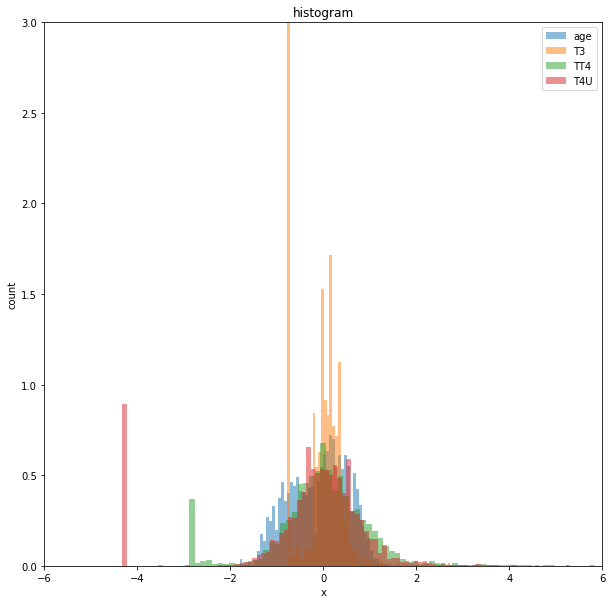

In [45]:
plt.figure(figsize=(10, 10))

plt.hist(x_train_scaled['age'], bins=50, alpha=0.5, density=True)
plt.hist(x_train_scaled['T3'], bins=100, alpha=0.5, density=True)
plt.hist(x_train_scaled['TT4'], bins=100, alpha=0.5, density=True)
plt.hist(x_train_scaled['T4U'], bins=100, alpha=0.5, density=True)

plt.legend(['age', 'T3', 'TT4', 'T4U'])
plt.xlabel('x')
plt.ylabel('count')
plt.title('histogram')
plt.ylim(0, 3)
plt.xlim(-6, 6)
plt.show()

In [46]:
x_train_scaled

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
2179,0.066667,-0.135135,-0.090909,-0.285714,-0.772727,0.314286,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
2180,-1.000000,1.531532,0.318182,-1.142857,-0.590909,-0.857143,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5603,0.166667,-0.513514,-0.045455,0.628571,-0.636364,1.342857,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
256,0.633333,-0.495495,-0.090909,-0.800000,0.000000,-0.800000,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
8111,1.066667,0.360360,-0.181818,-0.085714,-0.181818,0.085714,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,-0.766667,-0.495495,-0.772727,0.171429,-0.090909,0.285714,1,0,0,1,...,0,1,0,1,0,0,1,1,1,0
7553,0.500000,0.495495,-0.045455,-0.428571,-1.045455,0.400000,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
4050,0.266667,1.981982,0.227273,-0.057143,0.318182,-0.228571,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
5546,0.100000,0.540541,-0.772727,0.600000,0.772727,0.085714,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


In [47]:
y_train

2179    0
2180    0
5603    0
256     0
8111    0
       ..
1084    0
7553    0
4050    0
5546    0
5190    0
Name: target, Length: 5834, dtype: int64

## Over-Sampling (SMOTE)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

print(f'Before Over-Sampling : {x_train_scaled.shape}')
print(f'Before Over-Sampling : {y_train.shape}')
print(f'After Over-Sampling : {x_train_resampled.shape}')
print(f'After Over-Sampling : {y_train_resampled.shape}')

Before Over-Sampling : (5834, 35)
Before Over-Sampling : (5834,)
After Over-Sampling : (15732, 35)
After Over-Sampling : (15732,)


## 사용할 최종 데이터 확인

In [50]:
x_train_resampled

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_F,on_thyroxine_T,...,query_hyperthyroid_T,lithium_F,lithium_T,goitre_F,goitre_T,tumor_F,tumor_T,hypopituitary_F,psych_F,psych_T
0,0.066667,-0.135135,-0.090909,-0.285714,-0.772727,0.314286,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
1,-1.000000,1.531532,0.318182,-1.142857,-0.590909,-0.857143,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
2,0.166667,-0.513514,-0.045455,0.628571,-0.636364,1.342857,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
3,0.633333,-0.495495,-0.090909,-0.800000,0.000000,-0.800000,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
4,1.066667,0.360360,-0.181818,-0.085714,-0.181818,0.085714,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15727,0.247935,-0.497496,1.342219,3.186188,-0.183881,3.680280,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
15728,-0.626365,-0.525399,1.573744,4.321973,0.334610,4.018245,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
15729,-1.000707,-0.433171,0.737854,4.166440,-0.085618,4.556463,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
15730,-0.411009,-0.538132,2.422533,4.257143,-0.711067,5.987827,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0


In [51]:
y_train_resampled

0        0
1        0
2        0
3        0
4        0
        ..
15727    2
15728    2
15729    2
15730    2
15731    2
Name: target, Length: 15732, dtype: int64

In [52]:
negative_count = len(y_train_resampled[y_train_resampled==0])
hypothyroid_count = len(y_train_resampled[y_train_resampled==1])
hyperthroid_count = len(y_train_resampled[y_train_resampled==2])

print(f'negative count : {negative_count}')
print(f'hypothyroid count : {hypothyroid_count}')
print(f'hyperthyroid count : {hyperthroid_count}')

negative count : 5244
hypothyroid count : 5244
hyperthyroid count : 5244


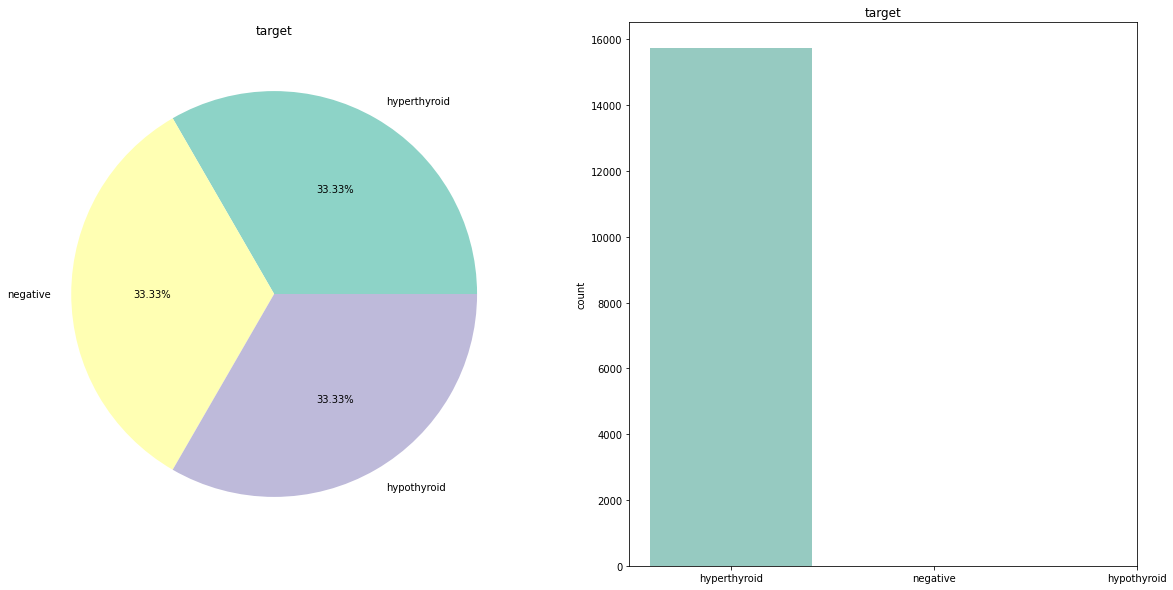

In [53]:
count = y_train_resampled.value_counts()
count.sort_index(inplace=True)

label = ['hyperthyroid', 'negative', 'hypothyroid']
color = sns.color_palette('Set3')

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.pie(count, autopct='%.2f%%', labels=label, colors=color)
plt.title('target')

plt.subplot(122)
sns.countplot(y_train_resampled, palette=color)
plt.xticks([0, 1, 2], label)
plt.title('target')
plt.show()

## Classification Model Hyperparamter Tunning

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score

1. Logistic Regression

In [56]:
from pandas.core.common import random_state
lr = LogisticRegression(random_state=1)
lr.fit(x_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(x_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Naive Bayes Classifier

3. k Nearest Neighbor

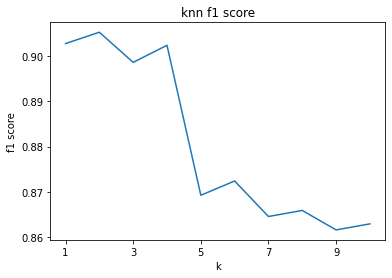

In [57]:
k = 10
f1Score = []

for kk in range(1, k+1):
  knn = KNeighborsClassifier(n_neighbors=kk)
  knn.fit(x_train_resampled, y_train_resampled)

  y_pred_knn = knn.predict(x_test_scaled)


  score = f1_score(y_test, y_pred_knn, average='macro')
  f1Score.append(score)

plt.plot(f1Score)
plt.xlabel('k')
plt.ylabel('f1 score')
plt.xticks([0, 2, 4, 6, 8], [1, 3, 5, 7, 9])
plt.title('knn f1 score')
plt.show()

4. Decision Tree

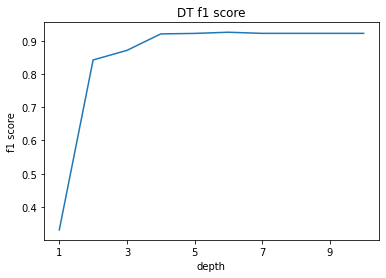

In [58]:
d = 10
f1Score = []

for dd in range(1, d+1):
  dt = DecisionTreeClassifier(max_depth=dd)
  dt.fit(x_train_resampled, y_train_resampled)

  y_pred_dt = dt.predict(x_test_scaled)
  score = f1_score(y_test, y_pred_dt, average='macro')
  f1Score.append(score)

plt.plot(f1Score)
plt.xlabel('depth')
plt.ylabel('f1 score')
plt.title('DT f1 score')
plt.xticks([0, 2, 4, 6, 8], [1, 3, 5, 7, 9])
plt.show()

5. Random Forest

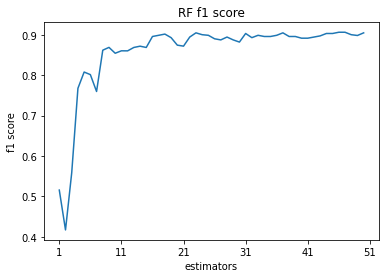

In [59]:
e = 50
f1Score = []

for ee in range(1, e+1):
  rf = RandomForestClassifier(n_estimators=ee, max_depth=4, random_state=1)
  rf.fit(x_train_resampled, y_train_resampled)

  y_pred_rf = rf.predict(x_test_scaled)

  score = f1_score(y_test, y_pred_rf, average='macro')
  f1Score.append(score)

plt.plot(f1Score)
plt.xlabel('estimators')
plt.ylabel('f1 score')
plt.title('RF f1 score')
plt.xticks([0, 10, 20, 30, 40, 50], [1, 11, 21, 31, 41, 51])
plt.show()


6. Support Vector Classifier

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svc = SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

grid_search = GridSearchCV(svc, param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train_resampled, y_train_resampled)

print(f'best params: {grid_search.best_params_}')

best params: {'C': 100, 'gamma': 0.1}


In [62]:
mean_score = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
print(mean_score)
mean_score = pd.DataFrame(mean_score)
mean_score.columns = param_grid['gamma']
mean_score.index = param_grid['C'][::-1]
mean_score

[[0.5120079  0.77555385 0.88030767 0.50911976 0.44639335 0.37070222]
 [0.74796683 0.93846962 0.95747526 0.7859128  0.44639335 0.37070222]
 [0.93967734 0.96745501 0.98436311 0.94342692 0.65344547 0.45232936]
 [0.96675579 0.98232907 0.99154585 0.99300788 0.92562998 0.76258411]
 [0.97800666 0.98843125 0.99434283 0.99370714 0.93122367 0.77809409]
 [0.98506245 0.99211813 0.99472412 0.99364357 0.93122367 0.77809409]]


,0.001,0.010,0.100,1.000,10.000,100.000
100.000,0.512008,0.775554,0.880308,0.509120,0.446393,0.370702
10.000,0.747967,0.938470,0.957475,0.785913,0.446393,0.370702
1.000,0.939677,0.967455,0.984363,0.943427,0.653445,0.452329
0.100,0.966756,0.982329,0.991546,0.993008,0.925630,0.762584
0.010,0.978007,0.988431,0.994343,0.993707,0.931224,0.778094
0.001,0.985062,0.992118,0.994724,0.993644,0.931224,0.778094


Text(0.5, 1.0, 'Grid Search Score')

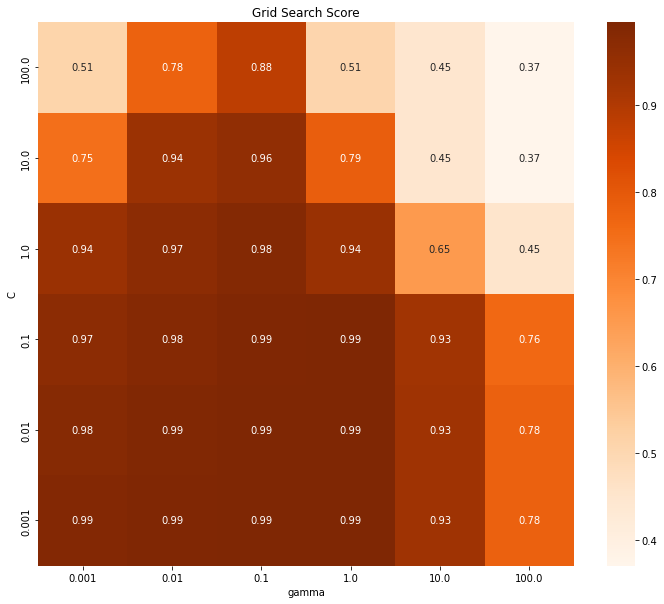

In [63]:
plt.figure(figsize=(12, 10))

sns.heatmap(mean_score, annot=True, cmap='Oranges')
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Grid Search Score')

## Model Evaluation

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score

In [65]:
totFscore = []
totAcc = []
totRec = []
totPrec = []

fscore1 = f1_score(y_pred_lr, y_test, average='macro')
acc1 = accuracy_score(y_pred_lr, y_test)
rec1 = recall_score(y_pred_lr, y_test, average='macro')
prec1 = precision_score(y_pred_lr, y_test, average='macro')
totFscore.append(fscore1)
totAcc.append(acc1)
totRec.append(rec1)
totPrec.append(prec1)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(x_test_scaled)
fscore2 = f1_score(y_test, y_pred_knn, average='macro')
acc2 = accuracy_score(y_test, y_pred_knn)
rec2 = recall_score(y_test, y_pred_knn, average='macro')
prec2 = precision_score(y_test, y_pred_knn, average='macro')
totFscore.append(fscore2)
totAcc.append(acc2)
totRec.append(rec2)
totPrec.append(prec2)

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(x_test_scaled)
fscore3 = f1_score(y_test, y_pred_dt, average='macro')
acc3 = accuracy_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt, average='macro')
prec3 = precision_score(y_test, y_pred_dt, average='macro')
totFscore.append(fscore3)
totAcc.append(acc3)
totRec.append(rec3)
totPrec.append(prec3)

rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=1)
rf.fit(x_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(x_test_scaled)
fscore4 = f1_score(y_test, y_pred_rf, average='macro')
acc4 = accuracy_score(y_test, y_pred_rf)
rec4 = recall_score(y_test, y_pred_rf, average='macro')
prec4 = precision_score(y_test, y_pred_rf, average='macro')
totFscore.append(fscore4)
totAcc.append(acc4)
totRec.append(rec4)
totPrec.append(prec4)

svc = SVC(C=0.1, gamma=0.1)
svc.fit(x_train_resampled, y_train_resampled)
y_pred_svc = svc.predict(x_test_scaled)
fscore5 = f1_score(y_test, y_pred_svc, average='macro')
acc5 = accuracy_score(y_test, y_pred_svc)
rec5 = recall_score(y_test, y_pred_svc, average='macro')
prec5 = precision_score(y_test, y_pred_svc, average='macro')
totFscore.append(fscore5)
totAcc.append(acc5)
totRec.append(rec5)
totPrec.append(prec5)

print(totFscore)
print(totAcc)
print(totRec)
print(totPrec)

[0.8272970785704553, 0.9024176031007943, 0.9203759689603189, 0.8740595849228058, 0.8204613155866487]
[0.9602467443454421, 0.9787525702535984, 0.9842357779300891, 0.971898560657985, 0.9561343385880741]
[0.7694953118039448, 0.9402193468705021, 0.9816396474371443, 0.9869134217657966, 0.9318352005290388]
[0.9208427341450448, 0.8696470428236575, 0.8762947017842203, 0.8136896540807609, 0.7543265334490021]


In [66]:
score = list(zip(totFscore, totAcc, totRec, totPrec))

score = pd.DataFrame(score, index=['Logistic Regression', 'k Nearest Neighbor', 'Decisoin Tree', 'Random Forest', 'Support Vector Classifier'], 
                     columns=['F1_score', 'Acc', 'Recall', 'Precision'])
score

,F1_score,Acc,Recall,Precision
Logistic Regression,0.827297,0.960247,0.769495,0.920843
k Nearest Neighbor,0.902418,0.978753,0.940219,0.869647
Decisoin Tree,0.920376,0.984236,0.981640,0.876295
Random Forest,0.874060,0.971899,0.986913,0.813690
Support Vector Classifier,0.820461,0.956134,0.931835,0.754327


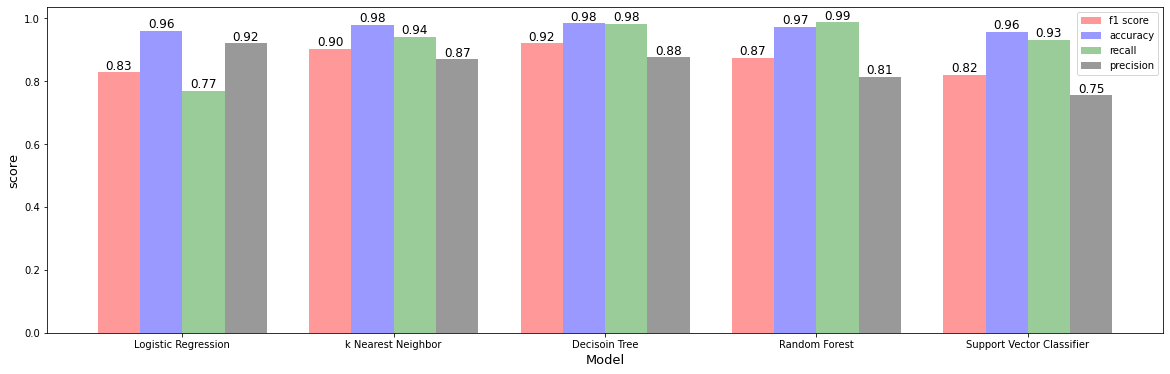

In [67]:
fig, ax = plt.subplots(figsize=(20,6))
bar_width = 0.2
index = np.arange(5)

b1 = plt.bar(index, score['F1_score'], bar_width, alpha=0.4, color='red', label='f1 score')
b2 = plt.bar(index + bar_width, score['Acc'], bar_width, alpha=0.4, color='blue', label='accuracy')
b3 = plt.bar(index + 2 * bar_width, score['Recall'], bar_width, alpha=0.4, color='green', label='recall')
b4 = plt.bar(index + 3 * bar_width, score['Precision'], bar_width, alpha=0.4, color='black', label='precision')

posit = [0.30, 1.30, 2.30, 3.30, 4.30]
plt.xticks(posit, score.index)
plt.xlabel('Model', size = 13)
plt.ylabel('score', size = 13)

bars = [b1, b2, b3, b4]

for bar in bars:
  for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)

plt.legend()
plt.show()